# Temporal Evolution of Makam and Usul Relationship in Turkish Makam - SymbTr dataset explorer

This notebook provides the necessary code to generate all the plots described in the paper **Temporal Evolution of Makam and Usul Relationship in Turkish Makam**. A selected number of plots are shown in the paper document, however all the computed material for the analysis can be accessed through this notebook or through the precomputed `plots` folder contained in this repository.

**(1) IMPORTANT:** Before proceeding, be sure to configure the path to your application and to the datasets correctly in the `config.ini` file as specified in the `README.md` file included in this repository.

**(2) IMPORTANT:** Many of the cells in this notebook perform long computations over the whole selected subset and these can take several minutes to finish. A progress bar is shown during each computation. If you just want to do a quick inspection of the results, consider using the pre-computed plots in the `plots` folder.

For more information about SymbTr please visit: [https://github.com/MTG/SymbTr](https://github.com/MTG/SymbTr)

# Imports  
`music21` is a toolkit for computer-aided musicology and is also the core library used in our work. Additionally, a few custom packages have been added to facilitare the data exploration and visualization of Turkish maka scores.

For more information about `music21` please visit [http://web.mit.edu/music21/](http://web.mit.edu/)

In [19]:
%load_ext autoreload
%autoreload 2

import os
import tqdm
import configparser
import music21
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy.signal import resample
from collections import Counter
from pprint import pprint
from packages import plotter
from packages.turkish_makam import ScoreSet, Makam, Usul

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Configuration
Some configuration parameters are used along the notebooks so please be sure they are correctly set up in `config.ini`. These parameters can be adjusted to your own needs if necessary.

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')  # Read config file

NOTATION_APP_PATH = config['music21']['notation_app_path']  # Location of notation app
MUSIC_XML_DIR = config['symbtr']['music_xml_path']  # Location of scores

# music21 setup
music21_user_settings = music21.environment.UserSettings()

try:
    music21_user_settings.create()
except Exception as e:
    print('An environment configuration file already exist. Setting subsequent values to this file...')

# Necessary to be able to visualize scores correctly
music21_user_settings['musicxmlPath'] = NOTATION_APP_PATH
music21_user_settings['ipythonShowFormat'] = 'musicxml'

An environment configuration file already exist. Setting subsequent values to this file...


# Makam and usul selection  
The following constants contain the selection of *makamlar* and *usuller* mentioned in the paper. The `.JSON` dictionary with the necessary data to parse this selection is already provided, but if other *makamlar* or *usuller* may be explored, some entries may be need to be added to the aforementioned files since these are not exhaustive to all *makamlar* and *usuller*.

In [4]:
SELECTED_MAKAMLAR = ['hicaz', 'nihavent', 'rast', 'huzzam', 'huseyni', 'segah', 'mahur', 'saba', 'acemasiran', 'buselik']

SELECTED_USULLER = ['aksak', 'duyek', 'sofyan', 'curcuna', 'semai', 'nimsofyan', 'aksaksemai', 'turkaksagi', 'yuruksemai', 'devrihindi', 'evfer', 'musemmen']

# Dataset overview
The following cells show an overview of what is present in the dataset. In order to do this, the custom `ScoreSet` class will be helpful.

The entire dataset contains 2200 scores.


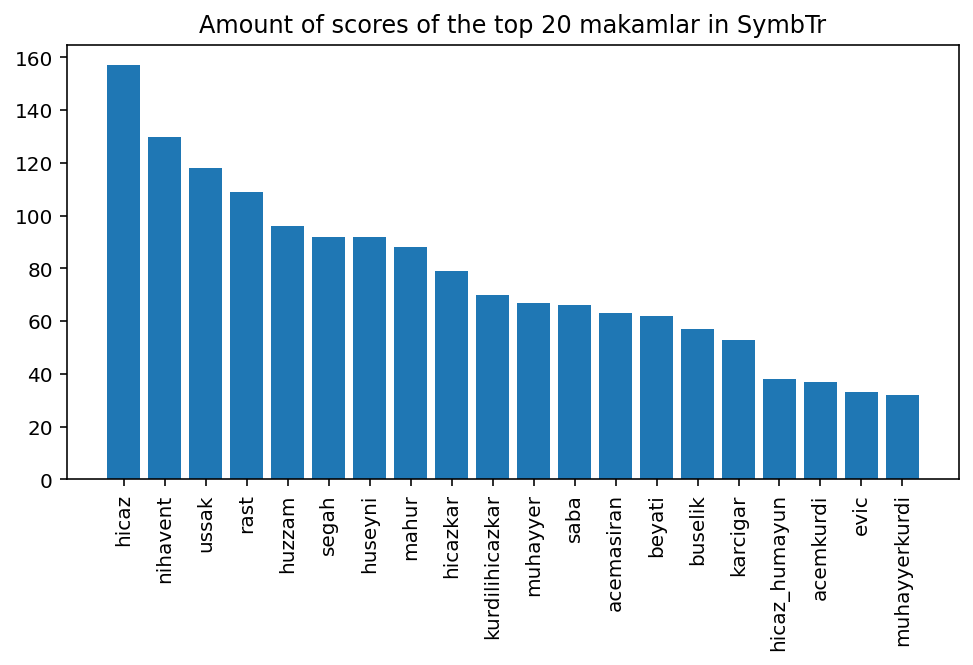

In [5]:
all_scores = ScoreSet(dir=MUSIC_XML_DIR, makamlar=['*'], usuller=['*'])  # Wildcar to include all scores
print(f'The entire dataset contains {len(all_scores.score_files)} scores.')

all_scores_by_makam = all_scores.get_makam_ranking(top_n=20) # Retrieve top 20 makamlar
all_scores_makam_names, all_scores_makam_count = map(list, zip(*all_scores_by_makam))

plt.figure(figsize=(8, 4))
plt.title('Amount of scores of the top 20 makamlar in SymbTr')
plt.bar(all_scores_makam_names, all_scores_makam_count)
plt.xticks(rotation=90)
plt.show()

Now let's do the same for usul categories.

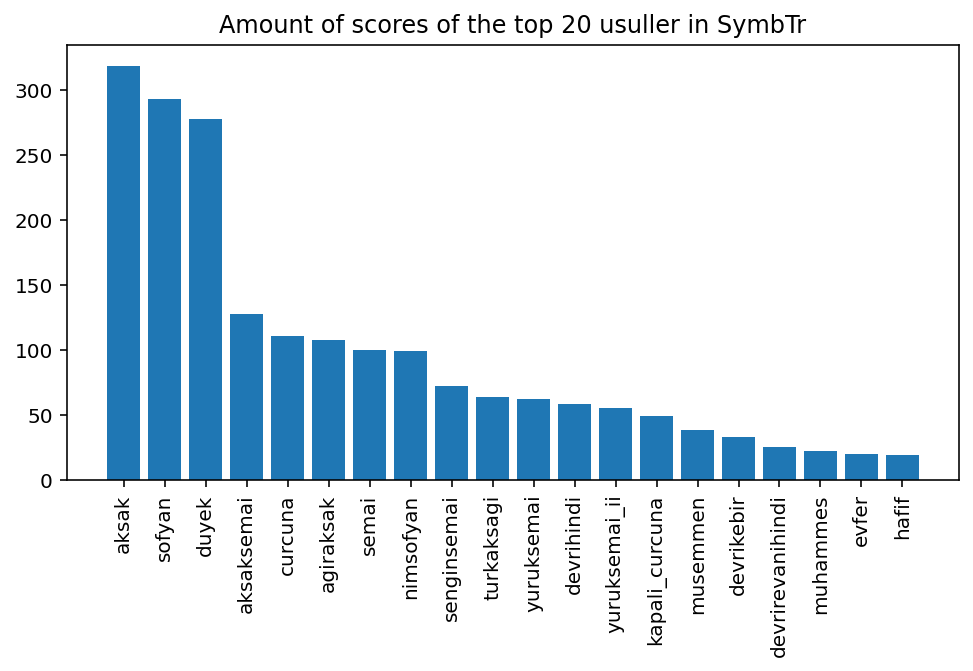

In [6]:
all_scores_by_usul = all_scores.get_usul_ranking(top_n=20)  # Retrieve top 20 usuller
all_scores_usul_names, all_scores_usul_count = map(list, zip(*all_scores_by_usul))

plt.figure(figsize=(8, 4))
plt.title('Amount of scores of the top 20 usuller in SymbTr')
plt.bar(all_scores_usul_names, all_scores_usul_count)
plt.xticks(rotation=90)
plt.show()

# Full list
Usuller and makamlar showing the biggest number of examples were prefered in order to extract representative results of the given dataset. For more details about the SymbTr it is recommended to read [A Turkish Makam Music Symbolic Database for Music Information Retrieval: SymbTr](https://repositori.upf.edu/bitstream/handle/10230/25700/Karaosmanoglu_ISMIR_2012.pdf?sequence=1) and check its repository [https://github.com/MTG/SymbTr](https://github.com/MTG/SymbTr)

In this cell you can change the list in `MAKAMLAR_SELECTION` and `USULLER_SELECTION` in order to see how many scores are available for a certain makam/usul combination. To include all makamlar or al usuller, `*` can be passed as a wild card. The example shown will gather all scores that contain either `rast` or `huseiny` as makam and `sofyan` or `curcuna` as usul. This search is purely based on file naming convention of the dataset and does not account for scores that may have one name on the dataset but may present more than one usul or makam.

In [7]:
# MAKAMLAR_SELECTION = ['*']  # This will search all available makamlar
MAKAMLAR_SELECTION = ['rast', 'huseyni']
USULLER_SELECTION = ['sofyan', 'curcuna']

scores_result = ScoreSet(dir=MUSIC_XML_DIR, makamlar=MAKAMLAR_SELECTION, usuller=USULLER_SELECTION)
scores_result_by_makam = scores_result.get_makam_ranking()

print(f'{len(scores_result.score_files)} scores contain makamlar {*MAKAMLAR_SELECTION,} and usuller {*USULLER_SELECTION,} of which:\n')

for makam, count in scores_result_by_makam:
    print(f'- makam {makam} has {count} available score(s)')

scores_result_by_usul = scores_result.get_usul_ranking()
print('\n')

for usul, count in scores_result_by_usul:
    print(f'- usul {usul} has {count} available score(s)')


48 scores contain makamlar ('rast', 'huseyni') and usuller ('sofyan', 'curcuna') of which:

- makam rast has 24 available score(s)
- makam huseyni has 24 available score(s)


- usul sofyan has 32 available score(s)
- usul curcuna has 16 available score(s)


# Selected makamlar and usuller for the scope of this research
The current research project uses a representative subset of the whole dataset. Additionally, some scores that contain more than one time signature or more than one makam have been discarded in order to compute our analysis over an equally distributed set of scores. Scores that have been discarded for these reasons are considered as `inconsistent_scores` and scores that match our desired criteria are names `consistent_scores`.

In [8]:
selected_scores = ScoreSet(dir=MUSIC_XML_DIR, makamlar=SELECTED_MAKAMLAR, usuller=SELECTED_USULLER)

print(f"{len(selected_scores.score_files)} scores match the chosen criteria for this study.")

687 scores match the chosen criteria for this study.


# Score consistency checkup and makam/usul alignment
Before utilizing the score selection, a consistency checkup is carried out. It will filter scores that have more than one makam, more than one usul or present any type of inconsistancy between what is annotated and the content of the score file. After each score is checked, an alignment process will go on where an usul pattern will be added to the score in order to proceed with the analysis. A progress bar is shown for each usul/makam pair.

**IMPORTANT**: This cell may take longer to run compared to the previous ones. Once it is done, the results are cached to compute all subsequent plots needed to replicate the research project.

In [9]:
%%time
aligned_makam_usul = ScoreSet.produce_makam_usul_overlap_data(MUSIC_XML_DIR, makam_list=SELECTED_MAKAMLAR, usul_list=SELECTED_USULLER)

onsistency filters.

Amount time signature mismatches for Makam segah, Usul turkaksagi 0.0 %

Pairing up usul yuruksemai with makam segah
Applying score consistency filter...: 100%|██████████| 2/2 [00:00<00:00, 67.42it/s]

All scores were succcessfully parsed.
100.00% (2/2) scores passed all consistency filters.
Applying score consistency filter...: 100%|██████████| 1/1 [00:00<00:00, 77.65it/s]
Amount time signature mismatches for Makam segah, Usul yuruksemai 0.0 %

Pairing up usul devrihindi with makam segah

All scores were succcessfully parsed.
100.00% (1/1) scores passed all consistency filters.

Amount time signature mismatches for Makam segah, Usul devrihindi 0.0 %

Pairing up usul evfer with makam segah
Empty ScoreSet instance.

No parsable and consistent scores left after processing.

Pairing up usul musemmen with makam segah

Parsing and sanitizing scores:   0%|          | 0/18 [00:00<?, ?it/s]
All scores were succcessfully parsed.
100.00% (1/1) scores passed all consistency f

# Plotting data  
All data for different makam/usul pairs is collected as a `pd.DataFrame()` to be used for plotting the results. By providing a `(makam, usul)` tuple it is possible to inspect how the `pd.DataFrame()` looks. Here, an example for makam `hicaz` and usul `duyek` is shown. You can change `ALIGNED_MAKAM` and `ALIGNED_USUL` to display another, but take into account that not all possible makam/usul combinations are available in the dataset.

In [10]:
ALIGNED_MAKAM = 'hicaz'
ALIGNED_USUL = 'duyek'

print("Objects and information provided by aligned_makam_usul are accessible through these keys:")
pprint(list(aligned_makam_usul[(ALIGNED_MAKAM, ALIGNED_USUL)].keys()))

df_aligned_makam_usul = aligned_makam_usul[(ALIGNED_MAKAM, ALIGNED_USUL)]['song_to_melodic_outline_df']
display(df_aligned_makam_usul.head())

Objects and information provided by aligned_makam_usul are accessible through these keys:
['makam',
 'usul',
 'scores_dict',
 'song_to_melodic_outline_dict',
 'song_to_melodic_outline_df',
 'timesig_mismatch_report']


,title,composer,time_sig,measure,offset,offset_abs,beat_type,duration,pitch_space,pitch_name,symbtr_name
0,Hiçbir Şeyde Gözüm Yok,Fethi Karamahmutoğlu,8/8,0,0.0,0.0,dum,0.5,305,A4,A4_0
1,Hiçbir Şeyde Gözüm Yok,Fethi Karamahmutoğlu,8/8,0,0.5,0.5,te-ek,1,340,F5,F5_0
2,Hiçbir Şeyde Gözüm Yok,Fethi Karamahmutoğlu,8/8,0,1.5,1.5,tek,0.5,340,F5,F5_0
3,Hiçbir Şeyde Gözüm Yok,Fethi Karamahmutoğlu,8/8,0,2.0,2.0,du-um,0.5,340,F5,F5_0
4,Hiçbir Şeyde Gözüm Yok,Fethi Karamahmutoğlu,8/8,0,3.0,3.0,te-ek,0.5,340,F5,F5_0


# Makam/usul matched onset outlines

The following code generates an `outlines` folder inside the `generated_plots` folder. This folder contains a collection of pdf files with the following naming convention:

```
{makam_name}_{usul_name}_{makam_direction}_{occurrences_in_dataset}_occ.pdf
```

For example:
```
buselik_aksak_ascending-descending_5_occ.pdf
```
Would mean the following:
- makam: buselik
- makam direction: ascending-descending
- usul: aksak 
- occurrences in dataset of this makam/usul combination: 5

Each plot shows one solid line and 2 dashed line. They describe the accumulated amount of notes matching usul onsets throghout the score subset containing a specific makam/usul combination. 
In the aforementioned example, this would represent all the scores with makam buselik and usul aksak.  

The x-axis has been obtained by resampling the scores to the same scale in order to compare pieces of different length. The y-axis is labeled with all the notes corresponding to the *scale* of a particular makam. The solid line represents the median and the dashed lines the 1st and 3rd quartile.

In [11]:
# Perform plot_per_makam_v_usul for all combinations (a progress bar is shown)
for makam_v_usul in tqdm.tqdm(list(aligned_makam_usul.keys())):
    df = aligned_makam_usul[makam_v_usul]['song_to_melodic_outline_df']

    if df.size > 0:
        plotter.gen_plot_per_makam_v_usul(df, makam_v_usul[0], makam_v_usul[1], '../generated_plots/outlines')

100%|██████████| 120/120 [01:37<00:00,  1.23it/s]


# Per song makam/usul matched onset outline
The following code generates an `outlines_per_song` folder inside `generated_plots` folder. This folder contains a collection of pdf files wih the following naming convention:

```
{makam}_v_{usul}_{makam_direction}_{occurrences_in_dataset}.pdf
```

For example:
```
acemasiran_v_aksak_descending_9
```

Would mean the following:
- makam: acemasiran
- makam direction: descending
- usul: aksak
- occurrences: 9

Each plot shows and outline plot (left) and a contour plot (right). The outline shows the average not of a certain bar (x-axis) that matches the usul onset along the score. The dots sizes represent the frequency of a specific note in that interval (i.e. a big dot corresponds to a note that has been frequently played in the interval, regardless of its duration, whereas a smaller dot is a note that has been played just a few times). Color coding has been added for *important* notes in scales such as *root*, *dominant* or *leading_tone*. The histogram shows a summary of the same information without considering temporal evolution.

**IMPORTANT:** If your computer does not have Turkish glyphs in the installed fonts, you may experience some `RuntimeWarning` mentioning information about missing glyphs. This is expected in such cases depending on your operating system as well as the font languages in your device. In any case, this is just a warning and will not impede the computations to finish and generate all the plots.

In [16]:
for makam_v_usul in tqdm.tqdm(aligned_makam_usul.keys(), desc='Computing makam/usul plots per score'):
    df = aligned_makam_usul[makam_v_usul]['song_to_melodic_outline_df']
    plotter.gen_score_plot_per_measure(df, makam_v_usul[0], makam_v_usul[1], plots_dir='../generated_plots/outline_per_song')

Computing makam/usul plots per score:  17%|█▋        | 20/120 [07:14<32:39, 19.59s/it]/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_pdf_ps.py:102: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)
Computing makam/usul plots per score: 100%|██████████| 120/120 [21:07<00:00, 10.56s/it]


# Usul visitations plot

This cell generates an `usul_visitations` folder inside `generated_plots` folder. This folder contains a collection of pdf, 3 within each folder named after an usuls' name. The naming convention is as follows:

```
{usul_name}{numerator_denominator}_duration_{aggregation_method}
```

- usul_name: The name of the usul.
- numerator_denominator: Time signature.
- aggregation_method: Agregation used in the computation (duration_mean, duration_sum or nr (count))

Each pdf file contains a bar plot showing a percentage distribution of how many times each usul his is *visited* by a note in the melody for a particular usul regardless of the makam.
`duration_mean` and `duration_sum` will show the mean of this quantity considering the length of the note, whereas count will just consider how many times, regardless of the duration of the notes.

In [21]:
plotter.gen_usul_visitations_plots(aligned_makam_usul, usuller=SELECTED_USULLER, plots_dir='')

Generation usul visitations plot: 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]


# Usul average note duration
The two following cells generate two plots inside the `usul_strokes_v_note_duration` folder. One of them `measures.pdf` contains the percentage distribution of how many times an usul note onset coincides with an onset of a note on the melody. Off usul beats are also computed within a 8th notes grid and outside of this grid. The second plot (and last cell of this notebook) computes the same plot but ignoring notes that coincide with the initial downbead of the usul. This plot is saved as `tails_of_measures.pdf`

In [24]:
plotter.gen_avg_note_duration_vs_usul(aligned_makam_usul, '')

100%|██████████| 120/120 [00:08<00:00, 13.46it/s]


In [25]:
plotter.gen_avg_note_duration_vs_usul_complete(aligned_makam_usul, '')

100%|██████████| 120/120 [00:08<00:00, 13.45it/s]
